In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pywrdrb 

from sglib.utils.load import HDF5Manager
from sglib.utils.load import load_drb_reconstruction
from sglib.droughts.ssi import SSIDroughtMetrics
from config import gage_flow_ensemble_fname, catchment_inflow_ensemble_fname
from config import FIG_DIR, OUTPUT_DIR, RECONSTRUCTION_OUTPUT_FNAME

### Loading data
## Historic reconstruction data
# Total flow
Q = load_drb_reconstruction()
Q.replace(0, np.nan, inplace=True)
Q.drop(columns=['delTrenton'], inplace=True)  # Remove Trenton gage as it is not used in the ensemble

# Catchment inflows
Q_inflows = load_drb_reconstruction(gage_flow=False)
Q_inflows.replace(0, np.nan, inplace=True)
Q_inflows.drop(columns=['delTrenton'], inplace=True)  # Remove Trenton gage as it is not used in the ensemble

print(f"Loaded reconstruction data with {Q.shape[0]// 365} years of daily data for {Q.shape[1]} sites.")

Q_monthly = Q.resample('MS').sum()

Loaded reconstruction data with 79 years of daily data for 30 sites.


In [ ]:

data = pywrdrb.Data(results_sets=['major_flow'], 
                    print_status=True)
data.load_output(output_filenames=[RECONSTRUCTION_OUTPUT_FNAME])

Loading realization 1/50 from c:\Users\tjame\Desktop\Research\SGLib\pywrdrb\inputs\stationary_ensemble\gage_flow_mgd.hdf5
Loading realization 1/50 from c:\Users\tjame\Desktop\Research\SGLib\pywrdrb\inputs\stationary_ensemble\catchment_inflow_mgd.hdf5


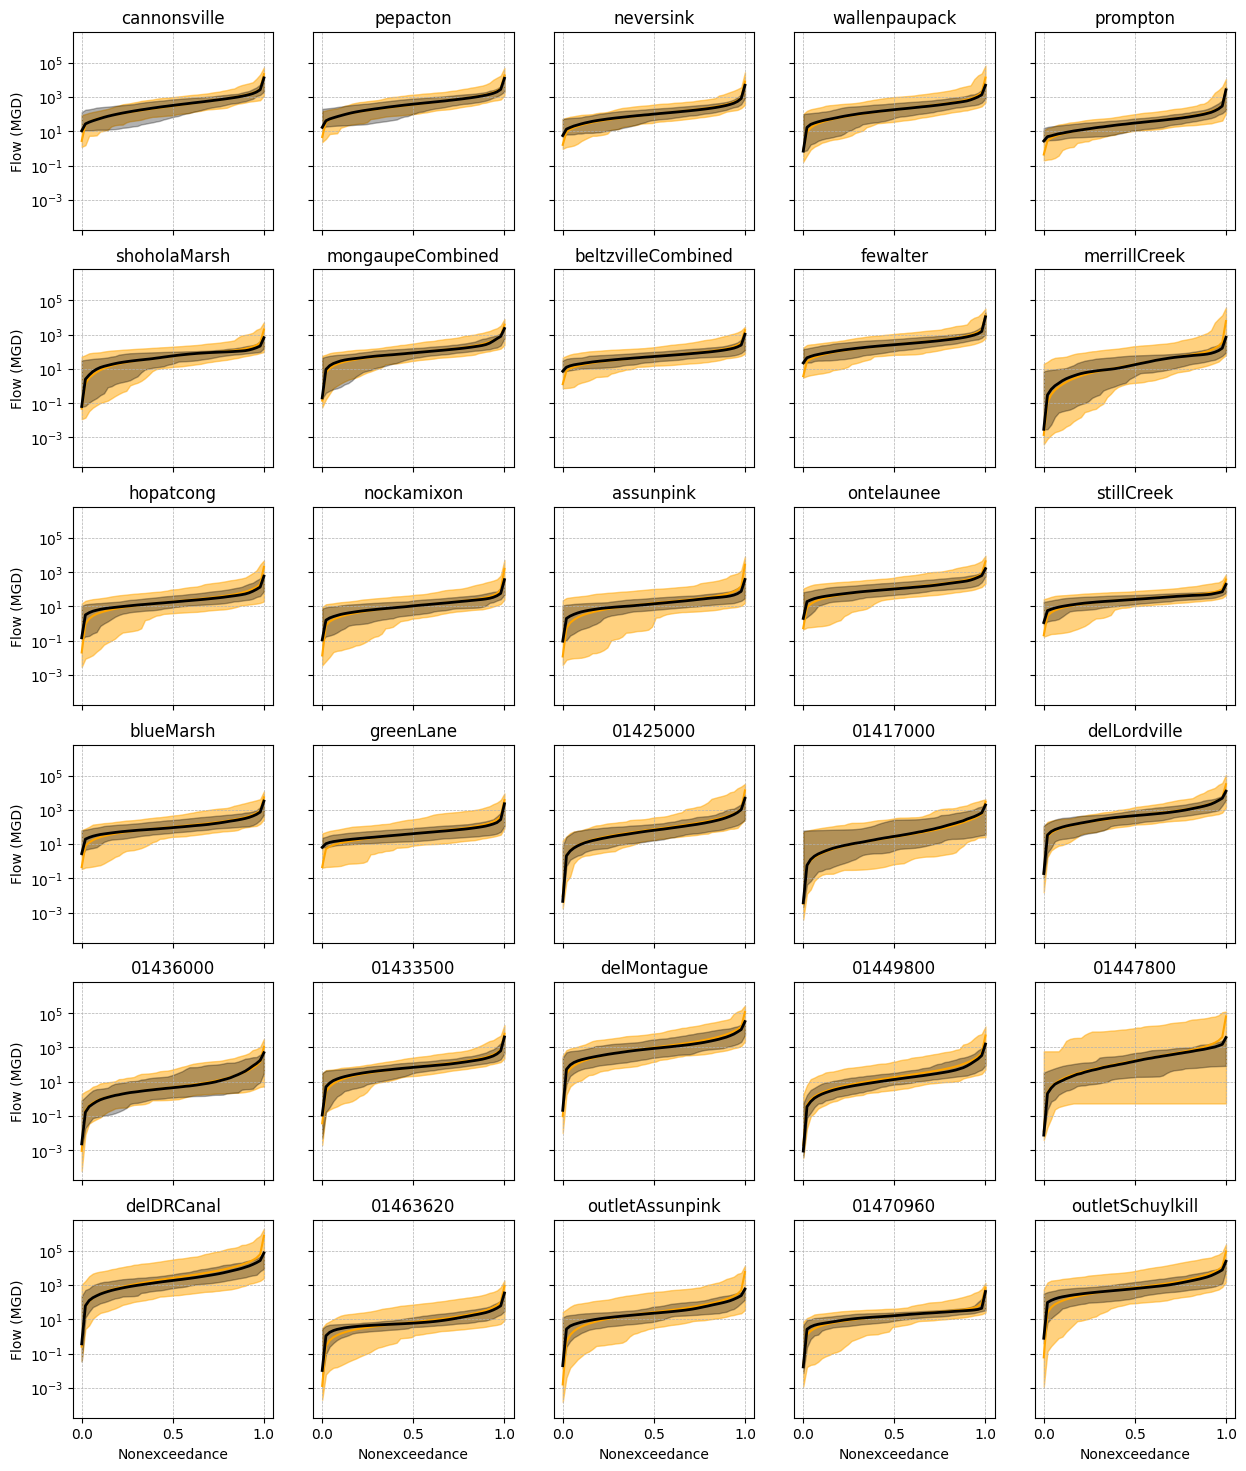

In [ ]:
### Plot gridded FDCs
from sglib.plotting.plot import plot_fdc_ranges
sites = list(Q.columns)

ncols = 5
nrows = int(np.ceil(len(sites) / ncols))

fig, axs = plt.subplots(figsize=(ncols*3, nrows*3), 
                       nrows=nrows, ncols=ncols, 
                       sharex=True, sharey=True)

for i, site in enumerate(sites):
    
    # use plot_fdc_ranges to plot the FDC
    ax = axs[i // ncols, i % ncols]
    
    plot_fdc_ranges(Q_inflows.loc[:, site],
                    Qs_inflow_syn[site].replace(0, np.nan),
                    legend=False,
                    ax=ax,
                    title=site,
                    units='MGD',
                    xylabels=False)

    if i % ncols == 0:
        ax.set_ylabel('Flow (MGD)')
    if i // ncols == nrows - 1:
        ax.set_xlabel('Nonexceedance')    

fname = FIG_DIR + '/fdc_inflows_grid.png'
plt.savefig(fname, dpi=200)
plt.show()



In [4]:
Qs_inflow_syn[site].min().min()

0.0